In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

from CCfun import load_ccd_file
from CCfun import load_ccd_files
from CCfun import sensible_std
from CCfun import pull
from CCfun import rebin

from invisible_cities.core.fit_functions import fit
from invisible_cities.core.fit_functions import polynom

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams[  "font.size"   ] = 15

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
path_0 = "/Users/Gonzalo/github/CCdata/bkg_light/"
path_1 = "/Users/Gonzalo/github/CCdata/shutter_closed/"

# Check consistency among measurements

In [5]:
filename0 = os.path.join(path_0, "bkg_100s_0.asc")
filename1 = os.path.join(path_0, "bkg_100s_1.asc")
filename2 = os.path.join(path_0, "bkg_100s_2.asc")

wl, data0, data0bls, _ = load_ccd_file(filename0)
wl, data1, data1bls, _ = load_ccd_file(filename1)
wl, data2, data2bls, _ = load_ccd_file(filename2)

/Applications/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/Applications/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/Applications/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/Applications/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
/Applications/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide


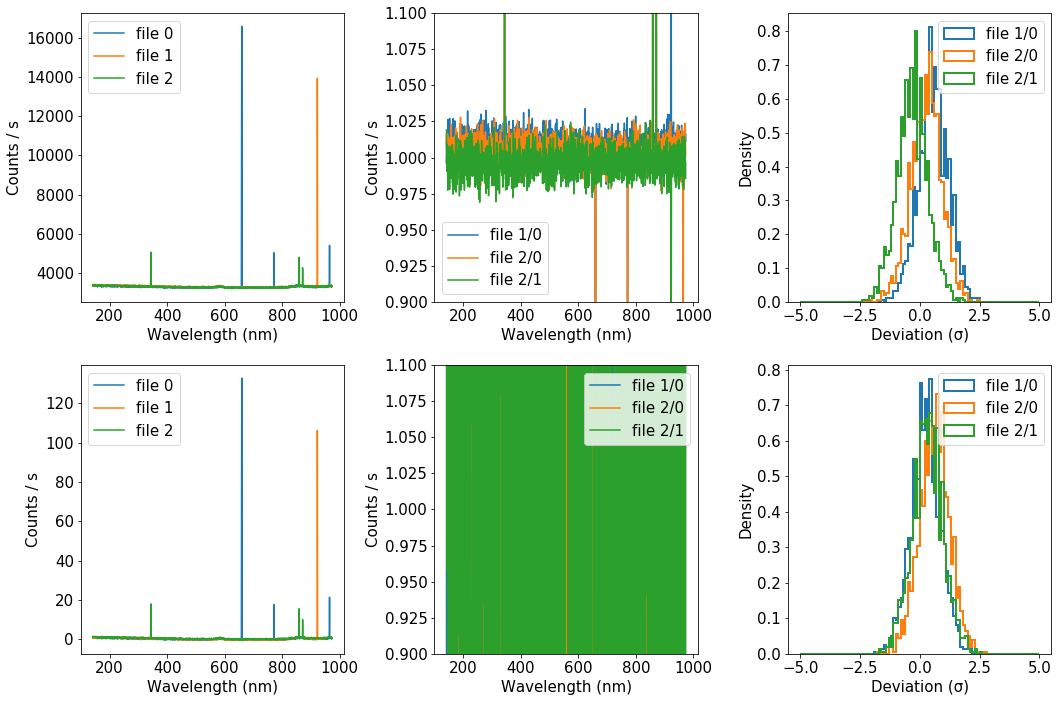

In [6]:
pbins = np.linspace(-5, 5, 101)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(wl, data0, label="file 0")
plt.plot(wl, data1, label="file 1")
plt.plot(wl, data2, label="file 2")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")

plt.subplot(2, 3, 2)
plt.plot(wl, data1 / data0, label="file 1/0")
plt.plot(wl, data2 / data0, label="file 2/0")
plt.plot(wl, data2 / data1, label="file 2/1")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")
plt.ylim(0.9, 1.1)

plt.subplot(2, 3, 3)
plt.hist(pull(data1, data0), pbins, histtype="step", lw=2, density=True, label="file 1/0")
plt.hist(pull(data2, data0), pbins, histtype="step", lw=2, density=True, label="file 2/0")
plt.hist(pull(data2, data1), pbins, histtype="step", lw=2, density=True, label="file 2/1")

plt.legend()
plt.xlabel("Deviation (σ)")
plt.ylabel("Density")

plt.subplot(2, 3, 4)
plt.plot(wl, data0bls, label="file 0")
plt.plot(wl, data1bls, label="file 1")
plt.plot(wl, data2bls, label="file 2")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")

plt.subplot(2, 3, 5)
plt.plot(wl, data1bls / data0bls, label="file 1/0")
plt.plot(wl, data2bls / data0bls, label="file 2/0")
plt.plot(wl, data2bls / data1bls, label="file 2/1")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")
plt.ylim(0.9, 1.1)

plt.subplot(2, 3, 6)
plt.hist(pull(data1bls, data0bls), pbins, histtype="step", lw=2, density=True, label="file 1/0")
plt.hist(pull(data2bls, data0bls), pbins, histtype="step", lw=2, density=True, label="file 2/0")
plt.hist(pull(data2bls, data1bls), pbins, histtype="step", lw=2, density=True, label="file 2/1")

plt.legend()
plt.xlabel("Deviation (σ)")
plt.ylabel("Density")

plt.tight_layout()

$$\rm{pull} = \frac{x - y}{\sqrt{\sigma_x^2 + \sigma_y^2}}$$

#### Repeat with ccd shutter closed

In [7]:
filename0 = os.path.join(path_1, "bkg_100s_shutter_closed_0.asc")
filename1 = os.path.join(path_1, "bkg_100s_shutter_closed_1.asc")
filename2 = os.path.join(path_1, "bkg_100s_shutter_closed_2.asc")

wl, data0, data0bls, _ = load_ccd_file(filename0)
wl, data1, data1bls, _ = load_ccd_file(filename1)
wl, data2, data2bls, _ = load_ccd_file(filename2)

/Applications/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/Applications/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/Applications/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/Applications/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide


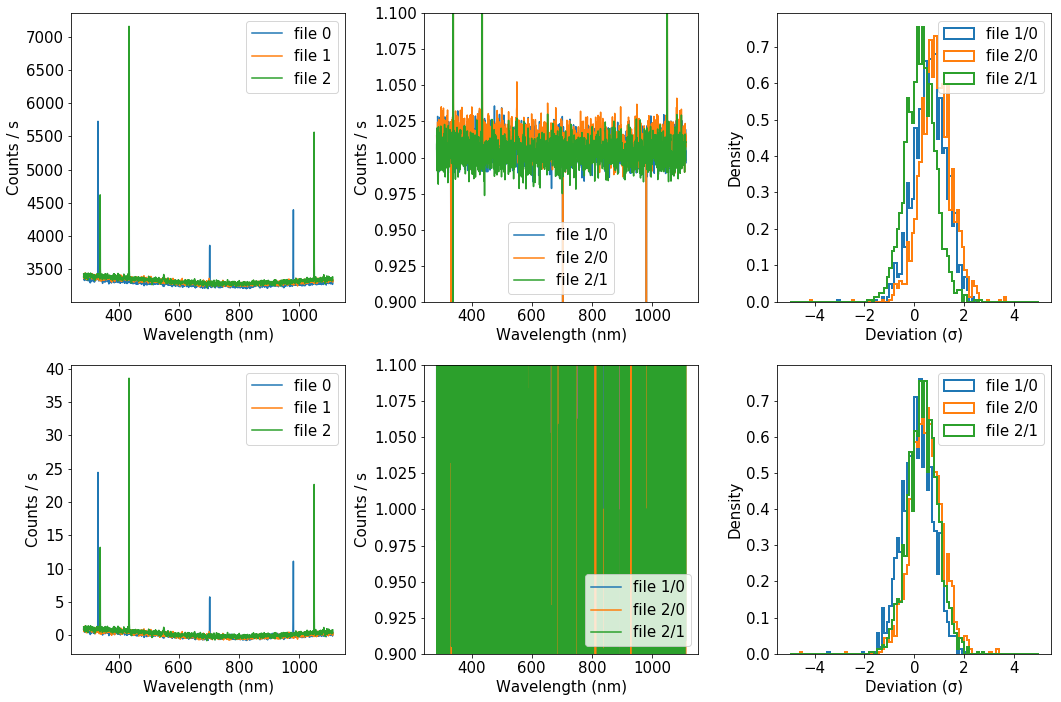

In [8]:
pbins = np.linspace(-5, 5, 101)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(wl, data0, label="file 0")
plt.plot(wl, data1, label="file 1")
plt.plot(wl, data2, label="file 2")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")

plt.subplot(2, 3, 2)
plt.plot(wl, data1 / data0, label="file 1/0")
plt.plot(wl, data2 / data0, label="file 2/0")
plt.plot(wl, data2 / data1, label="file 2/1")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")
plt.ylim(0.9, 1.1)

plt.subplot(2, 3, 3)
plt.hist(pull(data1, data0), pbins, histtype="step", lw=2, density=True, label="file 1/0")
plt.hist(pull(data2, data0), pbins, histtype="step", lw=2, density=True, label="file 2/0")
plt.hist(pull(data2, data1), pbins, histtype="step", lw=2, density=True, label="file 2/1")

plt.legend()
plt.xlabel("Deviation (σ)")
plt.ylabel("Density")

plt.subplot(2, 3, 4)
plt.plot(wl, data0bls, label="file 0")
plt.plot(wl, data1bls, label="file 1")
plt.plot(wl, data2bls, label="file 2")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")

plt.subplot(2, 3, 5)
plt.plot(wl, data1bls / data0bls, label="file 1/0")
plt.plot(wl, data2bls / data0bls, label="file 2/0")
plt.plot(wl, data2bls / data1bls, label="file 2/1")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")
plt.ylim(0.9, 1.1)

plt.subplot(2, 3, 6)
plt.hist(pull(data1bls, data0bls), pbins, histtype="step", lw=2, density=True, label="file 1/0")
plt.hist(pull(data2bls, data0bls), pbins, histtype="step", lw=2, density=True, label="file 2/0")
plt.hist(pull(data2bls, data1bls), pbins, histtype="step", lw=2, density=True, label="file 2/1")

plt.legend()
plt.xlabel("Deviation (σ)")
plt.ylabel("Density")

plt.tight_layout()

# Check the need for turning the lights off & putting a cloth on the system

In [9]:
filename_light_naked   = os.path.join(path_0, "bkg_100s_lights_on_cloth_off_0.asc" )
filename_light_covered = os.path.join(path_0, "bkg_100s_lights_on_cloth_on_0.asc"  )
filename_dark_naked    = os.path.join(path_0, "bkg_100s_lights_off_cloth_off_0.asc")
filename_dark_covered  = os.path.join(path_0, "bkg_100s_lights_off_cloth_on_0.asc" )

wl, light_naked  , _, _ = load_ccd_file(filename_light_naked  )
wl, light_covered, _, _ = load_ccd_file(filename_light_covered)
wl, dark_naked   , _, _ = load_ccd_file(filename_dark_naked   )
wl, dark_covered , _, _ = load_ccd_file(filename_dark_covered )

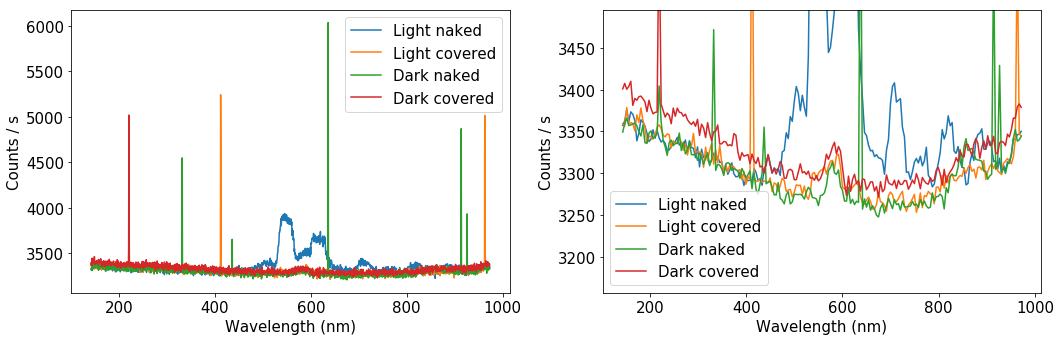

In [10]:
nr  = 8
wlr = rebin(wl, nr)

allwfs = np.concatenate([light_naked, light_covered, dark_naked, dark_covered])
ymin   = np.mean(allwfs) - 5 * sensible_std(allwfs)
ymax   = np.mean(allwfs) + 5 * sensible_std(allwfs)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(wl, light_naked  , label="Light naked")
plt.plot(wl, light_covered, label="Light covered")
plt.plot(wl,  dark_naked  , label="Dark naked")
plt.plot(wl,  dark_covered, label="Dark covered")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")

plt.subplot(1, 2, 2)
plt.plot(wlr, rebin(light_naked  , nr), label="Light naked")
plt.plot(wlr, rebin(light_covered, nr), label="Light covered")
plt.plot(wlr, rebin( dark_naked  , nr), label="Dark naked")
plt.plot(wlr, rebin( dark_covered, nr), label="Dark covered")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")
plt.ylim(ymin, ymax)

plt.tight_layout()

# Check consistency between exposures

#### 1 file for each exposure

In [11]:
filename_10  = os.path.join(path_1, "bkg_10s_shutter_closed_0.asc" )
filename_20  = os.path.join(path_1, "bkg_20s_shutter_closed_0.asc" )
filename_50  = os.path.join(path_1, "bkg_50s_shutter_closed_0.asc" )
filename_100 = os.path.join(path_1, "bkg_100s_shutter_closed_0.asc")

wl, _, data_10 , m10  = load_ccd_file(filename_10 )
wl, _, data_20 , m20  = load_ccd_file(filename_20 )
wl, _, data_50 , m50  = load_ccd_file(filename_50 )
wl, _, data_100, m100 = load_ccd_file(filename_100)

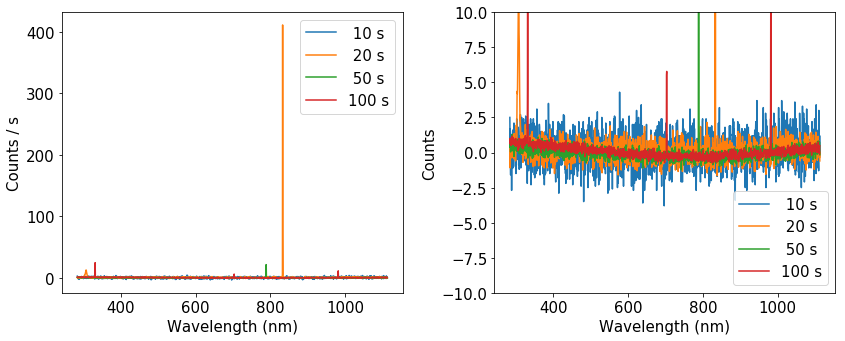

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(wl, data_10 , label=" 10 s")
plt.plot(wl, data_20 , label=" 20 s")
plt.plot(wl, data_50 , label=" 50 s")
plt.plot(wl, data_100, label="100 s")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")

plt.subplot(1, 2, 2)
plt.plot(wl, data_10 , label=" 10 s")
plt.plot(wl, data_20 , label=" 20 s")
plt.plot(wl, data_50 , label=" 50 s")
plt.plot(wl, data_100, label="100 s")

plt.ylim(-10, 10)

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")

plt.tight_layout()

#### Equalizing exposures

In [13]:
filenames_10  = glob.glob(os.path.join(path_1, "bkg_10s_shutter_closed_[0-9].asc"))
filenames_20  = glob.glob(os.path.join(path_1, "bkg_20s_shutter_closed_[0-4].asc"))
filenames_50  = glob.glob(os.path.join(path_1, "bkg_50s_shutter_closed_[0-1].asc"))
filenames_100 = glob.glob(os.path.join(path_1, "bkg_100s_shutter_closed_1.asc"   ))

wl, _, data_10 , m10  = load_ccd_files(filenames_10 )
wl, _, data_20 , m20  = load_ccd_files(filenames_20 )
wl, _, data_50 , m50  = load_ccd_files(filenames_50 )
wl, _, data_100, m100 = load_ccd_files(filenames_100)

(-5, 5)

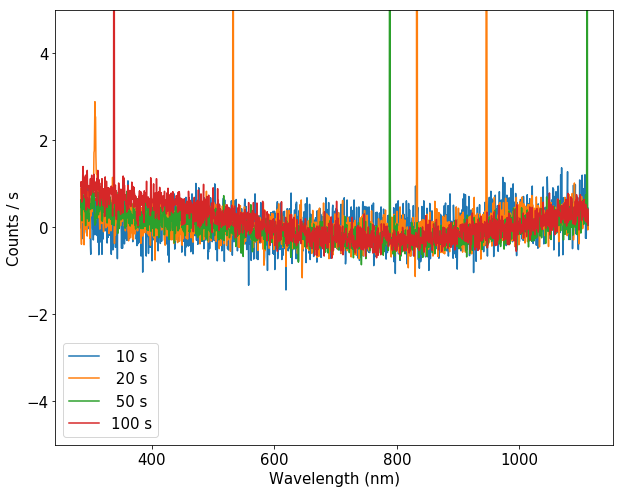

In [14]:
plt.plot(wl, data_10 , label=" 10 s")
plt.plot(wl, data_20 , label=" 20 s")
plt.plot(wl, data_50 , label=" 50 s")
plt.plot(wl, data_100, label="100 s")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")

plt.ylim(-5, 5)

# Baseline shape

In [15]:
filenames_10  = glob.glob(os.path.join(path_1, "bkg_10s_shutter_closed_[0-9].asc" ))
filenames_20  = glob.glob(os.path.join(path_1, "bkg_20s_shutter_closed_[0-9].asc" ))
filenames_50  = glob.glob(os.path.join(path_1, "bkg_50s_shutter_closed_[0-9].asc" ))
filenames_100 = glob.glob(os.path.join(path_1, "bkg_100s_shutter_closed_[0-9].asc"))

wl, _, data_10 , m10  = load_ccd_files(filenames_10 )
wl, _, data_20 , m20  = load_ccd_files(filenames_20 )
wl, _, data_50 , m50  = load_ccd_files(filenames_50 )
wl, _, data_100, m100 = load_ccd_files(filenames_100)

(-0.5, 1.5)

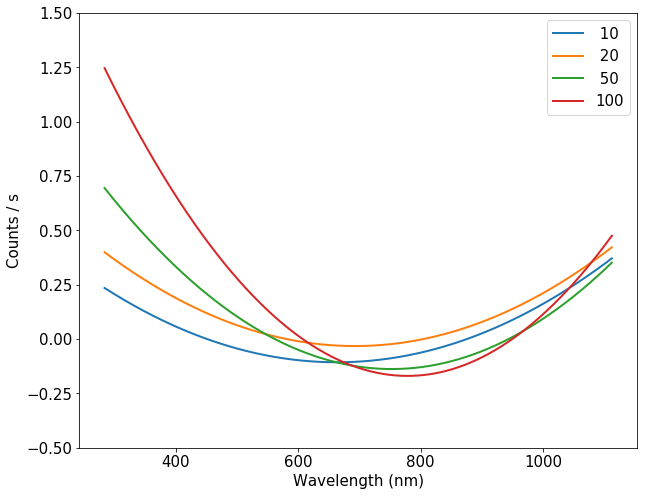

In [16]:
f_10  = fit(polynom, wl, data_10 , (1, -1600, 800)).fn
f_20  = fit(polynom, wl, data_20 , (1, -1600, 800)).fn
f_50  = fit(polynom, wl, data_50 , (1, -1600, 800)).fn
f_100 = fit(polynom, wl, data_100, (1, -1600, 800)).fn

plt.plot(wl, f_10 (wl), lw=2, label=" 10")
plt.plot(wl, f_20 (wl), lw=2, label=" 20")
plt.plot(wl, f_50 (wl), lw=2, label=" 50")
plt.plot(wl, f_100(wl), lw=2, label="100")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")

plt.ylim(-.5, 1.5)

### Repeat with baseline clampling

In [24]:
filenames_20  = glob.glob(os.path.join(path_1, "bkg_20s_shutter_closed_blc_0.asc" ))
filenames_50  = glob.glob(os.path.join(path_1, "bkg_50s_shutter_closed_blc_0.asc" ))
filenames_100 = glob.glob(os.path.join(path_1, "bkg_100s_shutter_closed_blc_0.asc"))

wl, _, data_20 , _ = load_ccd_files(filenames_20 )
wl, _, data_50 , _ = load_ccd_files(filenames_50 )
wl, _, data_100, _ = load_ccd_files(filenames_100)

(-5, 5)

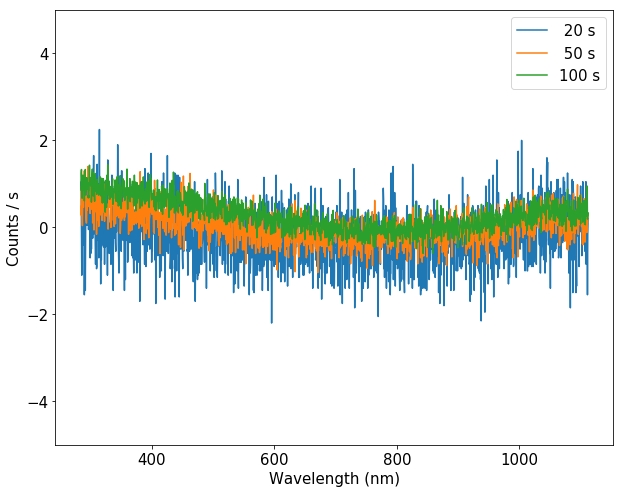

In [18]:
plt.plot(wl, data_20 , label=" 20 s")
plt.plot(wl, data_50 , label=" 50 s")
plt.plot(wl, data_100, label="100 s")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")

plt.ylim(-5, 5)

In [19]:
filenames_20  = glob.glob(os.path.join(path_1, "bkg_20s_shutter_closed_blc_[0-9].asc" ))
filenames_50  = glob.glob(os.path.join(path_1, "bkg_50s_shutter_closed_blc_[0-9].asc" ))
filenames_100 = glob.glob(os.path.join(path_1, "bkg_100s_shutter_closed_blc_[0-9].asc"))

wl, _, data_20 , m20  = load_ccd_files(filenames_20 )
wl, _, data_50 , m50  = load_ccd_files(filenames_50 )
wl, _, data_100, m100 = load_ccd_files(filenames_100)

(-0.5, 1.5)

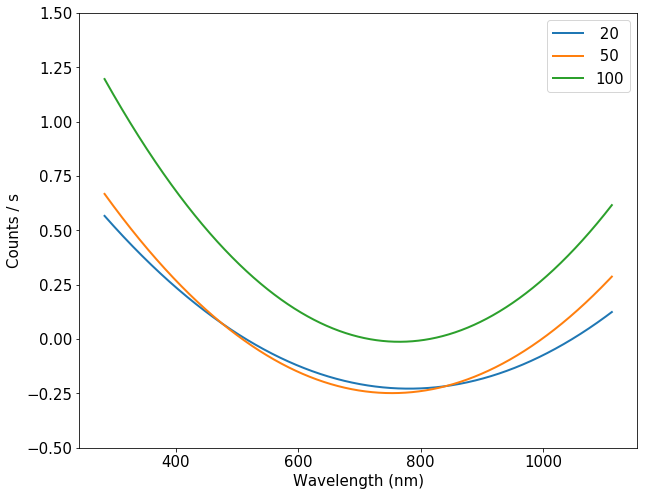

In [20]:
f_20  = fit(polynom, wl, data_20 , (1, -1600, 800)).fn
f_50  = fit(polynom, wl, data_50 , (1, -1600, 800)).fn
f_100 = fit(polynom, wl, data_100, (1, -1600, 800)).fn

plt.plot(wl, f_20 (wl), lw=2, label=" 20")
plt.plot(wl, f_50 (wl), lw=2, label=" 50")
plt.plot(wl, f_100(wl), lw=2, label="100")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts / s")

plt.ylim(-.5, 1.5)

# Trash

In [21]:
exposures     = 10, 20, 50, 100

filenames_10  = glob.glob(os.path.join(path_1, "bkg_10s_shutter_closed_[0-9].asc" ))
filenames_20  = glob.glob(os.path.join(path_1, "bkg_20s_shutter_closed_[0-9].asc" ))
filenames_50  = glob.glob(os.path.join(path_1, "bkg_50s_shutter_closed_[0-9].asc" ))
filenames_100 = glob.glob(os.path.join(path_1, "bkg_100s_shutter_closed_[0-9].asc"))

In [22]:
blss = {}
lins = {}
quas = {}

for exposure in exposures:
    bls = []
    lin = []
    qua = []    

    for filename in eval(f"filenames_{exposure}"):
        wl, _, data, _ = load_ccd_file(filename)
        
        f = fit(polynom, wl, data, (1, -1600, 800))
        bls = np.append(bls, f.values[0])
        lin = np.append(lin, f.values[1])
        qua = np.append(qua, f.values[2])
    
    blss[exposure] = bls
    lins[exposure] = lin
    quas[exposure] = qua

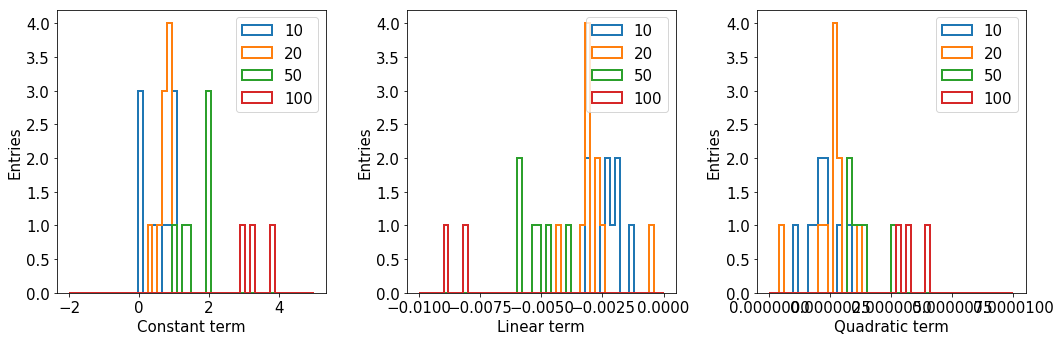

In [23]:
plt.figure(figsize=(15, 5))

bls_bins = np.linspace(-   2,    5, 51)
lin_bins = np.linspace(-1e-2,    0, 51)
qua_bins = np.linspace(    0, 1e-5, 51)

plt.subplot(1, 3, 1)
for exposure in exposures:
    plt.hist(blss[exposure], bls_bins, histtype="step", lw=2, label=str(exposure))

plt.legend()
plt.xlabel("Constant term")
plt.ylabel("Entries")

plt.subplot(1, 3, 2)
for exposure in exposures:
    plt.hist(lins[exposure], lin_bins, histtype="step", lw=2, label=str(exposure))
    
plt.legend()
plt.xlabel("Linear term")
plt.ylabel("Entries")

plt.subplot(1, 3, 3)
for exposure in exposures:
    plt.hist(quas[exposure], qua_bins, histtype="step", lw=2, label=str(exposure))
    
plt.legend()
plt.xlabel("Quadratic term")
plt.ylabel("Entries")

plt.tight_layout()